# Problem 3
## (a.) K-NN

In [35]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [17]:
def plot_digit(data, label):
    plt.figure()
    plt.title('True label = ' + str(label))
    plt.imshow(np.reshape(data, (28, 28)), cmap='gray')



In [78]:
train = np.loadtxt('10HW3_train.txt')
val = np.loadtxt('10HW3_validate.txt')
test = np.loadtxt('10HW3_test.txt')

train_x = train[:, 0:784]  # 0 ~ 783
train_y = train[:, 784]  # last one (784)
val_x = val[:, 0:784]
val_y = val[:, 784]
test_x = test[:, 0:784]
test_y = test[:, 784]
k = [1, 3, 5, 11, 16, 21]

# plot_digit(train_x[555], train_y[555])


In [34]:
train_err = []
test_err = []
val_err = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pre_train = knn.predict(train_x)
    pre_test = knn.predict(test_x)
    pre_val = knn.predict(val_x)

    train_err_i = round(1 - knn.score(train_x, train_y), 3)
    val_err_i = round(1 - knn.score(val_x, val_y), 3)
    test_err_i = round(1 - knn.score(test_x, test_y), 3)

    train_err.append(test_err_i)
    val_err.append(val_err_i)
    test_err.append(test_err_i)

print("For each of values of k:")
print(f"Training error  : {train_err}")
print(f"Validation error: {val_err}")
print(f"Testing error   : {test_err}")


For each of values of k
Training error  : [0.107, 0.097, 0.083, 0.127, 0.137, 0.153]
Validation error: [0.127, 0.143, 0.13, 0.173, 0.197, 0.203]
Testing error   : [0.107, 0.097, 0.083, 0.127, 0.137, 0.153]


## (b.) 3-NN

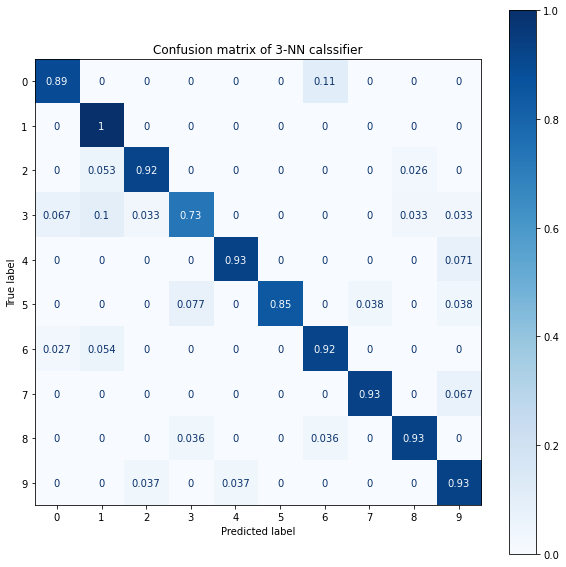

In [87]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x, train_y)
pre_test = knn.predict(test_x)

class_names = np.arange(0, 10, step=1)
title = "Confusion matrix of 3-NN calssifier"

ax1 = plt.figure(figsize=(10, 10)).subplots()

disp = ConfusionMatrixDisplay.from_estimator(
    estimator=knn,
    X=test_x,
    y=test_y,
    display_labels=class_names,
    cmap=plt.cm.Blues,
    normalize="true",
    ax=ax1,
)
disp.ax_.set_title(title)
plt.show()


根據上方confusion matrix結果顯示，我認為數字1的分類最為簡單，因其正確率數值最高，並且最難辨識為數字3，其TP值僅有0.73

## (c.) Error case

Totle error case: 29


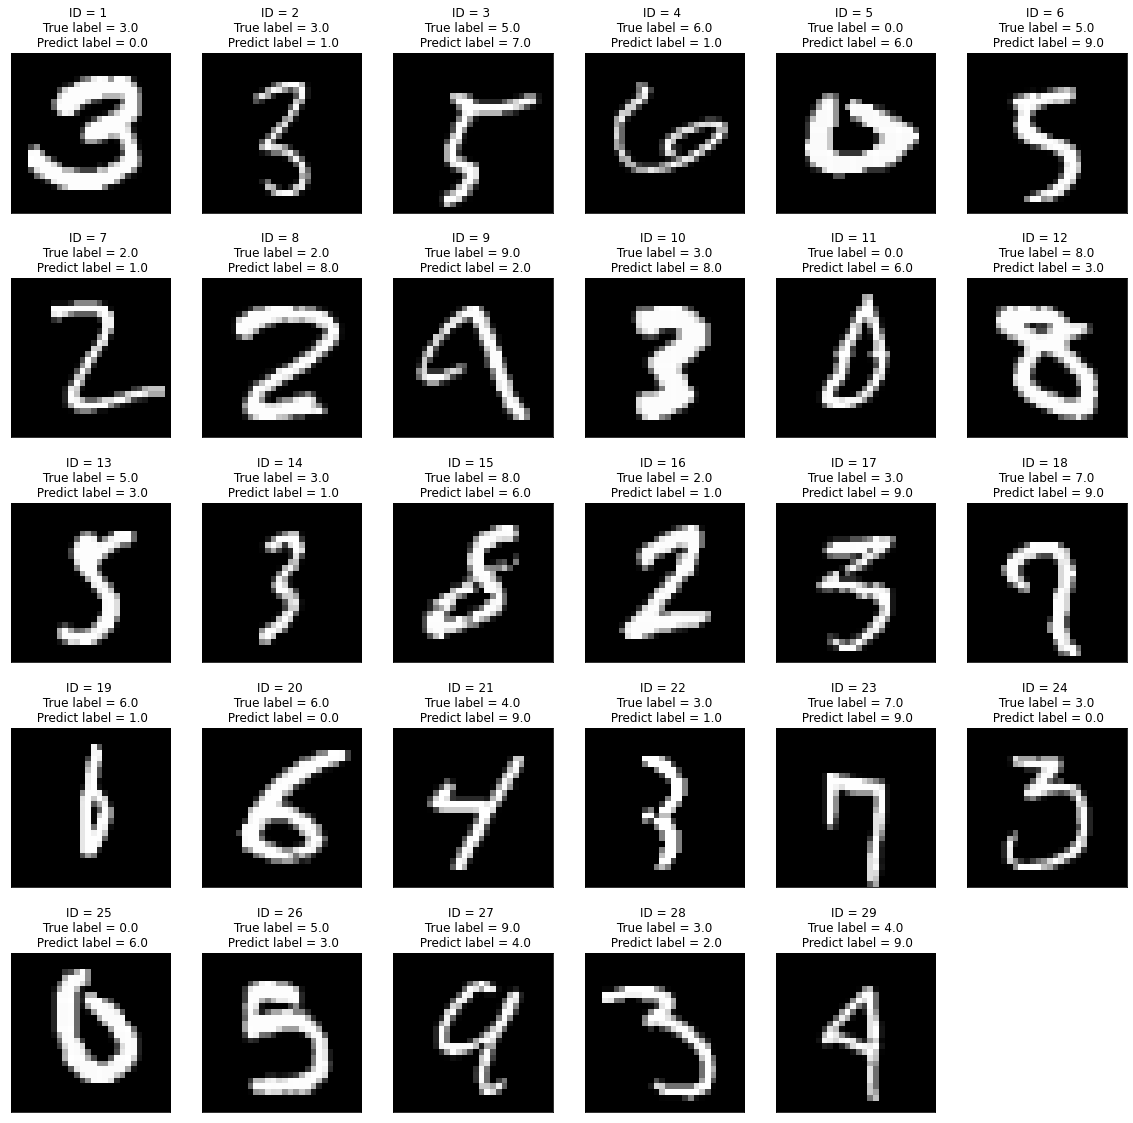

In [148]:
err = test_y == pre_test
num = sum(err == False)
print(f"Totle error case: {num}")

# np.where will return tuple, which contain 2 element
index = np.where(err == False)[0]

plt.figure(figsize=(20, 20), facecolor='white')
for i_index, i_data in enumerate(index):
    plt.subplot(5, 6, (i_index + 1))
    plt.title(
        f"ID = {i_index+1} \n True label = {str(test_y[i_data])} \n Predict label = {str(pre_test[i_data])}"
    )
    plt.imshow(np.reshape(test_x[i_data], (28, 28)), cmap='gray')
    plt.xticks([]), plt.yticks([])

plt.show()


將此次預測結果錯誤的結果全部繪製出來，共29筆資料，可發現有些確實是人眼當下就可以辨識出來的結果，此部分應再將KNN的內部參數調整好即可，如距離計算方式等等。

但同時也可發現如ID:5, 18, 25這幾張圖樣，我自己肉眼判斷也很難決定到底是甚麼數字，難以辨認